# Запросы корректировки данных

В запросах будет участвовать таблица `book`(создание, заполнение):

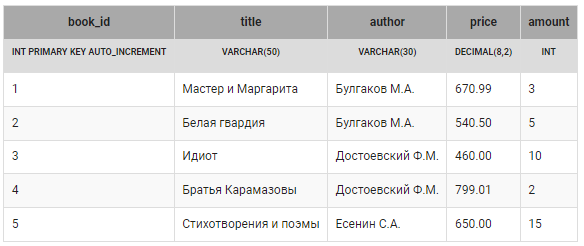

### 28 Создание пустой таблицы

Создать таблицу поставка (`supply`), которая имеет ту же структуру, что и таблица book.

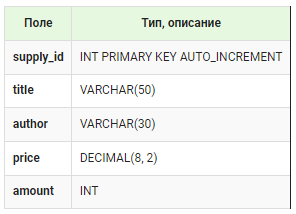

In [ ]:
CREATE TABLE supply(
             supply_id INT PRIMARY KEY AUTO_INCREMENT,
             title VARCHAR(50),
             author VARCHAR(30),
             price DECIMAL(8,2),
             amount INT
                   );

### 29 Добавление записей в таблицу

Занесите в таблицу `supply` четыре записи, чтобы получилась следующая таблица:

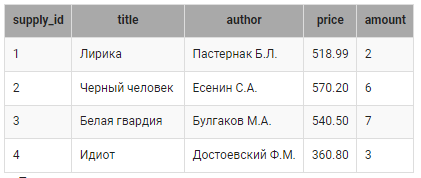

In [ ]:
INSERT INTO supply(title, author, price, amount)
VALUES ('Лирика', 'Пастернак Б.Л.', 518.99, 2),
       ('Черный человек' ,'Есенин С.А.', 570.20, 6),
       ('Белая гвардия', 'Булгаков М.А.', 540.50, 7),
       ('Идиот', 'Достоевский Ф.М.', 360.80, 3)

### 30 Добавление записей из другой таблицы

Добавить из таблицы `supply` в таблицу `book`, все книги, кроме книг, написанных Булгаковым М.А. и Достоевским Ф.М.

In [ ]:
INSERT INTO book(title, author, price, amount)
SELECT title, 
       author, 
       price, 
       amount
  FROM supply
 WHERE author NOT IN( 'Булгаков М.А.' ,  'Достоевский Ф.М.');
SELECT * 
  FROM book;

### 31 Добавление записей, вложенные запросы

Занести из таблицы `supply` в таблицу `book` только те книги, авторов которых нет в `book`.

In [ ]:
INSERT INTO book (title, author, price, amount)
SELECT title, author, price, amount
  FROM supply
 WHERE author NOT IN(SELECT author
                       FROM book);
SELECT * 
  FROM book;

### 32 Запросы на обновление

Уменьшить на 10% цену тех книг в таблице `book`, количество которых принадлежит интервалу от 5 до 10, включая границы.

In [ ]:
UPDATE book
   SET price = 0.9 * price
 WHERE amount BETWEEN 5 and 10;
SELECT * 
  FROM book;

### 33 Запросы на обновление нескольких столбцов

В таблице `book` необходимо скорректировать значение для покупателя в столбце buy таким образом, чтобы оно не превышало количество экземпляров книг, указанных в столбце amount. А цену тех книг, которые покупатель не заказывал, снизить на 10%.

In [ ]:
+---------+-----------------------+------------------+--------+--------+-----+
| book_id | title                 | author           | price  | amount | buy |
+---------+-----------------------+------------------+--------+--------+-----+
| 1       | Мастер и Маргарита    | Булгаков М.А.    | 670.99 | 3      | 0   |
| 2       | Белая гвардия         | Булгаков М.А.    | 540.50 | 5      | 3   |
| 3       | Идиот                 | Достоевский Ф.М. | 460.00 | 10     | 8   |
| 4       | Братья Карамазовы     | Достоевский Ф.М. | 799.01 | 2      | 0   |
| 5       | Стихотворения и поэмы | Есенин С.А.      | 650.00 | 15     | 18  |
+---------+-----------------------+------------------+--------+--------+-----+

In [ ]:
UPDATE book
   SET buy = IF(buy > amount, amount, buy),
       price = IF(buy = 0, price*0.9, price);
SELECT * 
  FROM book;

### 34 Запросы на обновление нескольких таблиц 

Для тех книг в таблице `book`, которые есть в таблице `supply`, не только увеличить их количество в таблице `book` (увеличить их количество на значение столбца amount таблицы `supply`), но и пересчитать их цену (для каждой книги найти сумму цен из таблиц `book` и `supply` и разделить на 2).

In [ ]:
UPDATE book, supply
   SET book.amount = book.amount + supply.amount,
       book.price = (book.price + supply.price) / 2
 WHERE book.title = supply.title AND book.author = supply.author;
SELECT * 
  FROM book;

### 35 Запросы на удаление

Удалить из таблицы `supply` книги тех авторов, общее количество экземпляров книг которых в таблице `book` превышает 10.

In [ ]:
DELETE FROM supply
 WHERE author IN(SELECT  author  
                   FROM book
                  GROUP BY author
                 HAVING SUM(amount)>10);
SELECT * 
  FROM supply;

### 36 Запросы на создание таблицы

Создать таблицу заказ (`ordering`), куда включить авторов и названия тех книг, количество экземпляров которых в таблице `book` меньше среднего количества экземпляров книг в таблице `book`. В таблицу включить столбец amount, в котором для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице `book`.

In [ ]:
CREATE TABLE ordering AS 
SELECT author, 
       title, 
       (SELECT ROUND(AVG(amount))
          FROM book) AS amount
  FROM book
 WHERE amount < (SELECT AVG(amount) 
                   FROM book);
SELECT * 
  FROM ordering;

### 37

Делаем скидку 5% на самое большое количество экземпляров книг (Стихи Есенина).

In [ ]:
UPDATE book SET price=round(price*0.95,2)
 WHERE author = 'Есенин С.А.';
SELECT * 
  FROM book;